machine learning code for churning customers
This notebook is divided into several parts.


1. data collection
1.   data cleaning
2.   exploratory data analysis
3.   removing unnecessary columns
3.   testing models
4.   finding the best model
5.   choosing whether to focus on recall or precision
6.   improving the model
7.   output




data collection

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: BankChurners.csv        


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/BankChurners.csv')

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
data.shape

(10127, 23)

**Data cleaning**
: here we focus on removing any null values or duplicated rows

In [ ]:
if data.duplicated().any():
  print("Duplicate rows found in the dataset.")
else:
  print("No duplicate rows found in the dataset.")


No duplicate rows found in the dataset.


In [ ]:
# Code to check if null values are present in  the dataset

if data.isnull().values.any():
  print("Null values found in the dataset.")
else:
  print("No null values found in the dataset.")


No null values found in the dataset.


In [ ]:
del data['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1']
del data['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
#deleting data according to the post which told us to delete it

Performing exploratory data analysis

In [ ]:
data['Attrition_Flag'].value_counts()
#this shows us that the dataset is imbalanced
#We will try to overcome this by applying oversampling as critical information can be lost while undersampling
#test-set split should be done before applying over-sampling otherwise dataset split could be uneven.

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


 Exploratory data analysis. We perform this to visualize our data better and check which all fields in the data are relevant to get proper output

In [ ]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
cat_cols.remove('Attrition_Flag') #we removed the attrition flag as it is what we are supposed to predict

In [ ]:
# Encoding - to surpass the curse of dimensionality we will go ahead with Label encoding instead of OHE.

from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


                          CLIENTNUM  Attrition_Flag  Customer_Age    Gender  \
CLIENTNUM                  1.000000       -0.046430      0.007613  0.020188   
Attrition_Flag            -0.046430        1.000000      0.018203 -0.037272   
Customer_Age               0.007613        0.018203      1.000000 -0.017312   
Gender                     0.020188       -0.037272     -0.017312  1.000000   
Dependent_count            0.006772        0.018991     -0.122254  0.004563   
Education_Level           -0.003789        0.005551      0.004083  0.000694   
Marital_Status            -0.003284        0.018597     -0.011265 -0.000007   
Income_Category           -0.025802        0.017584     -0.013474 -0.539731   
Card_Category              0.007511       -0.006038     -0.020131  0.079203   
Months_on_book             0.134588        0.013687      0.788912 -0.006728   
Total_Relationship_Count   0.006907       -0.150005     -0.010931  0.003157   
Months_Inactive_12_mon     0.005729        0.152449 

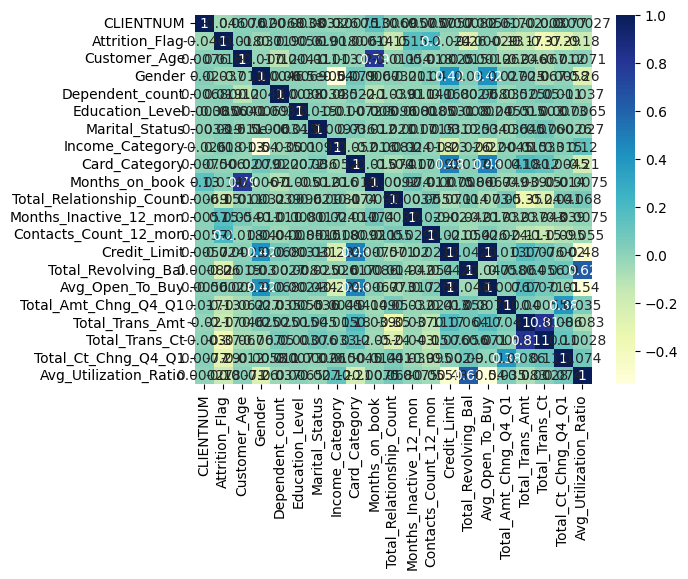

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
print(data.corr())
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Attrition_Flag'],axis=1)
y = data['Attrition_Flag']

X_train, X_rem, y_train, y_rem = train_test_split(X, y,
                                                  train_size=0.70)
X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem,
                                                    test_size=0.5)

In [ ]:
y_test.value_counts()

,count
Attrition_Flag,
0,1273
1,247


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

Logistic Regression Accuracy: 0.9138157894736842
Logistic Regression precision: 0.79
Logistic Regression recall: 0.6396761133603239
Logistic Regression f1: 0.7069351230425056
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1273
           1       0.79      0.64      0.71       247

    accuracy                           0.91      1520
   macro avg       0.86      0.80      0.83      1520
weighted avg       0.91      0.91      0.91      1520




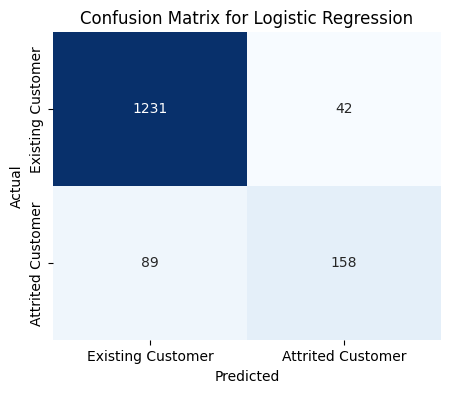

K-Nearest Neighbors Accuracy: 0.8947368421052632
K-Nearest Neighbors precision: 0.7604790419161677
K-Nearest Neighbors recall: 0.5141700404858299
K-Nearest Neighbors f1: 0.6135265700483091
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1273
           1       0.76      0.51      0.61       247

    accuracy                           0.89      1520
   macro avg       0.84      0.74      0.78      1520
weighted avg       0.89      0.89      0.89      1520




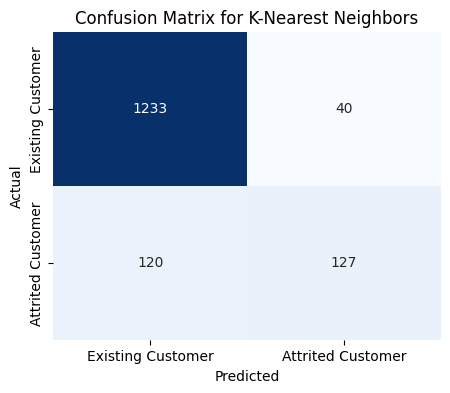

SVM Classifier Accuracy: 0.9243421052631579
SVM Classifier precision: 0.8402061855670103
SVM Classifier recall: 0.659919028340081
SVM Classifier f1: 0.7392290249433107
Classification Report for SVM Classifier:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1273
           1       0.84      0.66      0.74       247

    accuracy                           0.92      1520
   macro avg       0.89      0.82      0.85      1520
weighted avg       0.92      0.92      0.92      1520




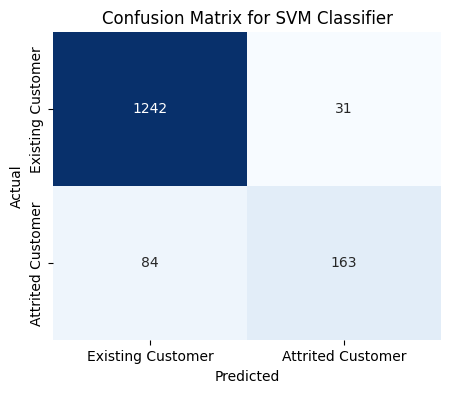

Decision Tree Classifier Accuracy: 0.9203947368421053
Decision Tree Classifier precision: 0.7386363636363636
Decision Tree Classifier recall: 0.7894736842105263
Decision Tree Classifier f1: 0.7632093933463797
Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1273
           1       0.74      0.79      0.76       247

    accuracy                           0.92      1520
   macro avg       0.85      0.87      0.86      1520
weighted avg       0.92      0.92      0.92      1520




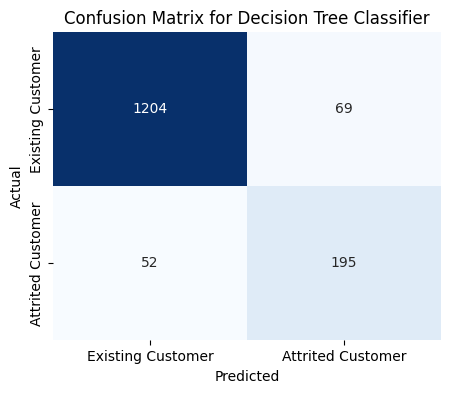

Random Forest Classifier Accuracy: 0.9638157894736842
Random Forest Classifier precision: 0.9528301886792453
Random Forest Classifier recall: 0.8178137651821862
Random Forest Classifier f1: 0.8801742919389978
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1273
           1       0.95      0.82      0.88       247

    accuracy                           0.96      1520
   macro avg       0.96      0.90      0.93      1520
weighted avg       0.96      0.96      0.96      1520




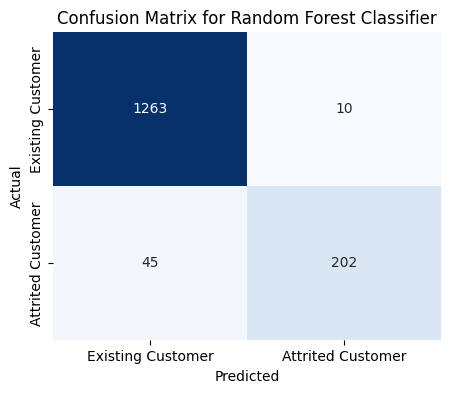

Gradient Boosting Classifier Accuracy: 0.9631578947368421
Gradient Boosting Classifier precision: 0.9282511210762332
Gradient Boosting Classifier recall: 0.8380566801619433
Gradient Boosting Classifier f1: 0.8808510638297873
Classification Report for Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1273
           1       0.93      0.84      0.88       247

    accuracy                           0.96      1520
   macro avg       0.95      0.91      0.93      1520
weighted avg       0.96      0.96      0.96      1520




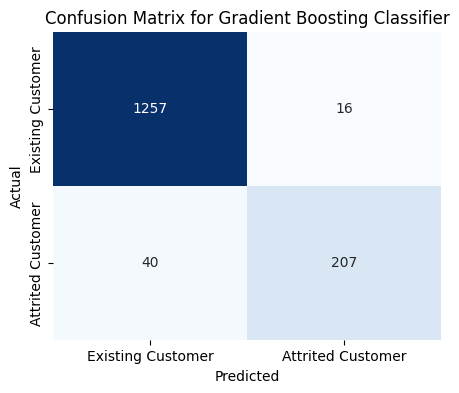

XGBoost Classifier Accuracy: 0.9677631578947369
XGBoost Classifier precision: 0.9267241379310345
XGBoost Classifier recall: 0.8704453441295547
XGBoost Classifier f1: 0.8977035490605428
Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1273
           1       0.93      0.87      0.90       247

    accuracy                           0.97      1520
   macro avg       0.95      0.93      0.94      1520
weighted avg       0.97      0.97      0.97      1520




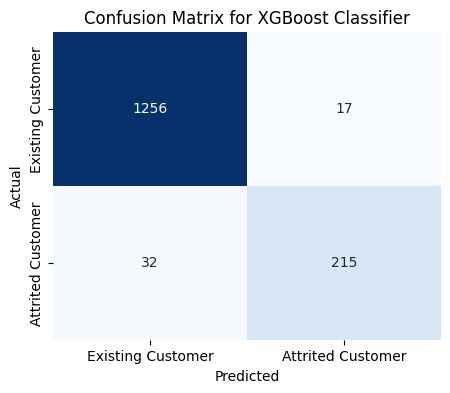

AdaBoost Classifier Accuracy: 0.9526315789473684
AdaBoost Classifier precision: 0.8854625550660793
AdaBoost Classifier recall: 0.8137651821862348
AdaBoost Classifier f1: 0.8481012658227848
Classification Report for AdaBoost Classifier:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1273
           1       0.89      0.81      0.85       247

    accuracy                           0.95      1520
   macro avg       0.92      0.90      0.91      1520
weighted avg       0.95      0.95      0.95      1520




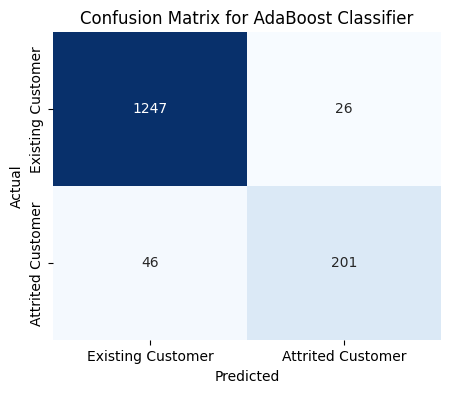

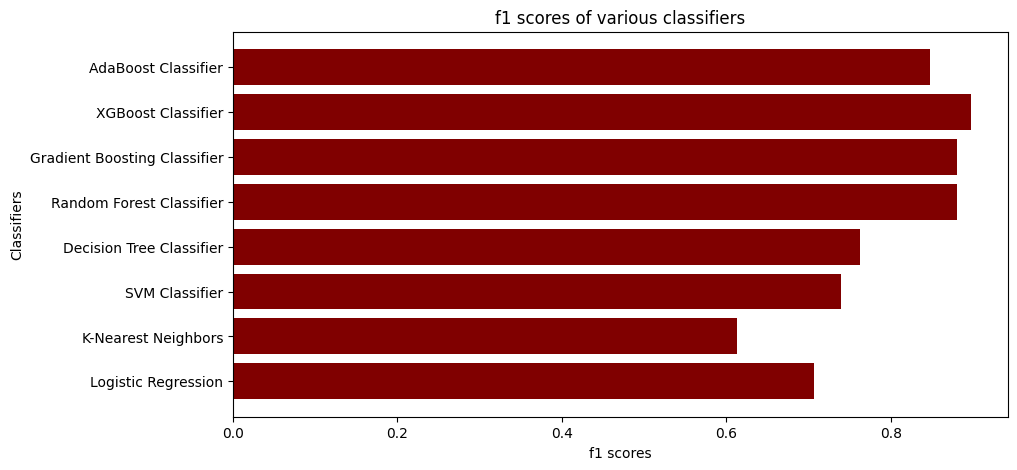

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'SVM Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier()
}
f1score = []
# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1score.append(f1)
    report = classification_report(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
    print(f'{name} precision: {precision}')
    print(f'{name} recall: {recall}')
    print(f'{name} f1: {f1}')
    print(f'Classification Report for {name}:\n{report}\n')
    plt.figure(figsize=(5, 4))
    sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Existing Customer', 'Attrited Customer'], yticklabels=['Existing Customer', 'Attrited Customer'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

fig = plt.figure(figsize=(10, 5))
cl = list(classifiers.keys())
# creating the horizontal bar plot
plt.barh(cl, f1score, color='maroon')

plt.xlabel("f1 scores")
plt.ylabel("Classifiers")
plt.title("f1 scores of various classifiers")
plt.show()

final chosen model is xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')